In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car=pd.read_csv('quikr_car.csv') 
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [3]:
car.shape

(892, 6)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


**Now Need to see whats are the problem this data has**
1. Year has many non-year values
2. Year values are in object, need to change to int
3. Price column has one non-price value-'Ask For Price'
4. Price values have ',', required to remove that.
5. Price values are in object, need to change to int
6. kms_driven column values have 'kmns' word with integer
7. kms_driven values are in object, need to change to int
8. kms_driven column has nan value
9. fuel_type column has nan value
10. Name values are big, which can cause problem to analysis, so we will keep only firse 3 words of each values.

In [5]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [6]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [7]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [8]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

**##Cleaning the Data**

**year has many non-year values**

In [9]:
car['year'].str.isnumeric()
#the above string method separating numeric and non-numeric values by convering it to boolean

0       True
1       True
2       True
3       True
4       True
       ...  
887    False
888     True
889     True
890     True
891     True
Name: year, Length: 892, dtype: bool

In [10]:
car['year'].str.isnumeric().value_counts()
#counts of Numeric and non-numeric values of year 

year
True     842
False     50
Name: count, dtype: int64

In [11]:
car=car[car['year'].str.isnumeric()]
car
#here we only keeping True values means the numeric values in year column, so 50 non-numeric valued row deleted here.

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


**year is in object. Change to integer**

In [12]:
car.loc[:, 'year'] = car['year'].astype(int)
#We changing year data type from object to integer

In [13]:
car.info()
#chcking the type of data of year

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    object
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 46.0+ KB


**Price has Ask for Price**

In [14]:
car=car[car['Price']!='Ask For Price']
#exclding 'Ask For Price' row from data

**Price has commas in its prices and is in object**

In [15]:
car.loc[:, 'Price'] = car['Price'].str.replace(',', '').astype(int)

In [16]:
car.info()
#chcking the type of data of year

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    object
 3   Price       819 non-null    object
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: object(6)
memory usage: 44.8+ KB


**kms_driven has object values with kms at last.**

In [17]:
car.loc[:, 'kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',', '')
car['kms_driven']
#applying string function, splitting the values and only keeping 1st value. Next omit the ',' from that 1st value applying replace function.

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

**It has nan values and two rows have 'Petrol' in them**

In [18]:
car=car[car['kms_driven'].str.isnumeric()]
car['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 817, dtype: object

**kms_driven is in object. Change to integer**

In [19]:
car['kms_driven']=car['kms_driven'].astype(int)
#We changing year data type from object to integer

In [20]:
car.info()
#chcking the type of data of kms_driven

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    object
 3   Price       817 non-null    object
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(1), object(5)
memory usage: 41.5+ KB


**fuel_type has nan values**

In [21]:
car[car['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [22]:
# Keep only rows where 'fuel_type' is not NaN
car = car[car['fuel_type'].notna()]

In [23]:
#checking again if that row has romove or not
car[car['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type


**name and company had spammed data...but with the previous cleaning, those rows got removed.**
**Company does not need any cleaning now. Changing car names. Keeping only the first three words**

In [24]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')
car
#spliting the name column's each values and only keeping first 3 words

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [25]:
car=car.reset_index(drop=True)
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [26]:
car.describe()

,kms_driven
count,816.000000
mean,46275.531863
std,34297.428044
min,0.000000
25%,27000.000000
50%,41000.000000
75%,56818.500000
max,400000.000000


In [27]:
'''Looking at Price Column, Median (50%) = ~300,000 and Mean = ~411,717 - Since the mean is much larger than the median,it suggests there are very high values (outliers) pulling the average up.
Also, Q3 (75%) = ~491,250 and Max = 8,500,003 - The maximum value is way above what’s typical.Usually, values just above Q3 are okay, but here the max is ~17× Q3 — that’s a strong outlier.
IQR = Q3 - Q1 = 491,250 - 175,000 = 316,250 and Upper bound = Q3 + 1.5×IQR = 491,250 + (1.5×316,250) ≈ 965,625. So any price above ~965,625 is an outlier.
Since your max is 8,500,003, that is clearly an outlier.'''

'Looking at Price Column, Median (50%) = ~300,000 and Mean = ~411,717 - Since the mean is much larger than the median,it suggests there are very high values (outliers) pulling the average up.\nAlso, Q3 (75%) = ~491,250 and Max = 8,500,003 - The maximum value is way above what’s typical.Usually, values just above Q3 are okay, but here the max is ~17× Q3 — that’s a strong outlier.\nIQR = Q3 - Q1 = 491,250 - 175,000 = 316,250 and Upper bound = Q3 + 1.5×IQR = 491,250 + (1.5×316,250) ≈ 965,625. So any price above ~965,625 is an outlier.\nSince your max is 8,500,003, that is clearly an outlier.'

In [28]:
#car price above 60 lakh
car[car['Price']>6e6]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [29]:
#only one car valye is above 60 lakh, which is a outlier. will Keeps only rows with Price ≤ 6,000,000 for further process
car = car[car['Price'] <= 6e6].reset_index(drop=True)
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


**###Cleaned Data**

In [30]:
car.to_csv('Cleaned_Car_data.csv')

**Checking relationship of Company with Price**

In [31]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [32]:
import seaborn as sns

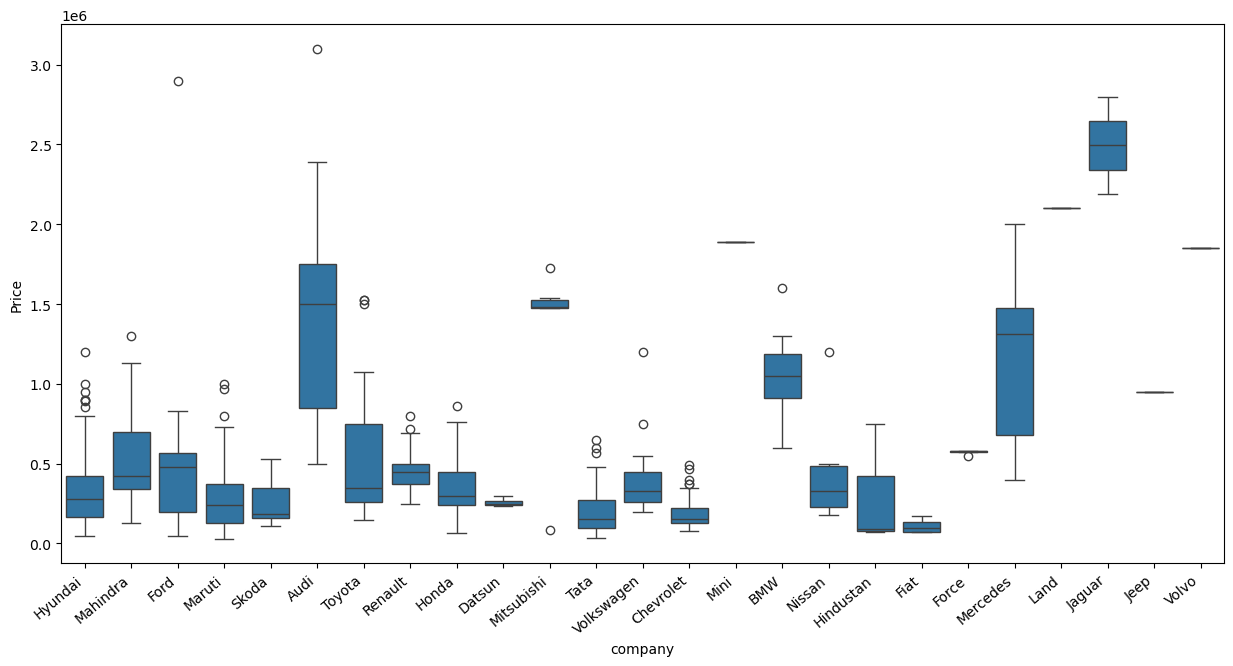

In [33]:
plt.figure(figsize=(15,7))  
sns.boxplot(x='company', y='Price', data=car)
# Rotate x-axis labels safely
plt.xticks(rotation=40, ha='right')
plt.show()

**Checking relationship of Year with Price**

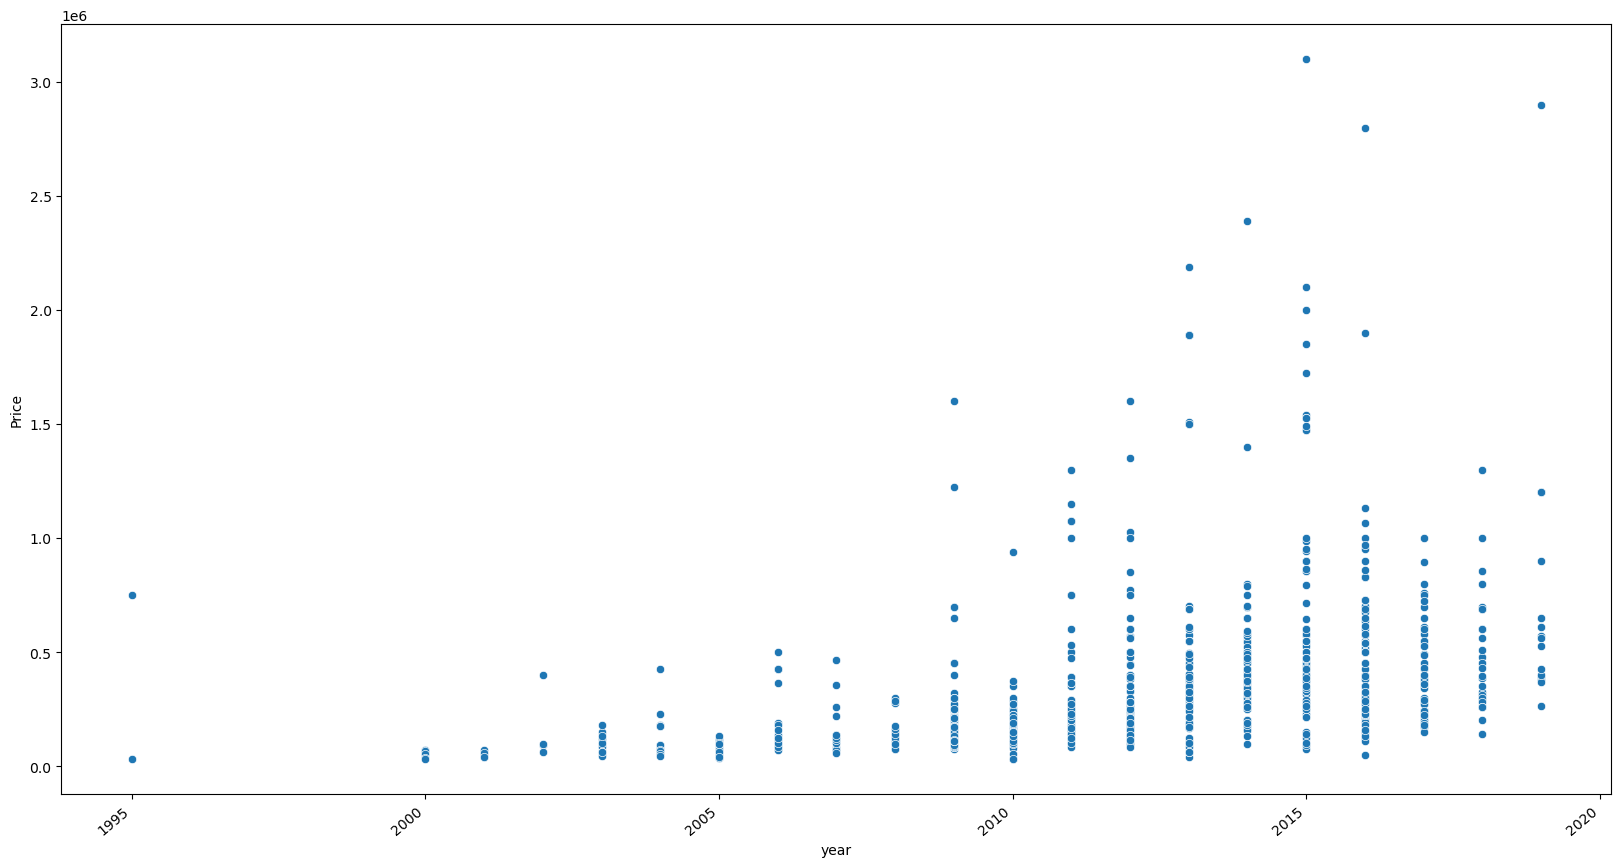

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='year', y='Price', data=car)
plt.xticks(rotation=40, ha='right')
plt.show()

**Checking relationship of kms_driven with Price**

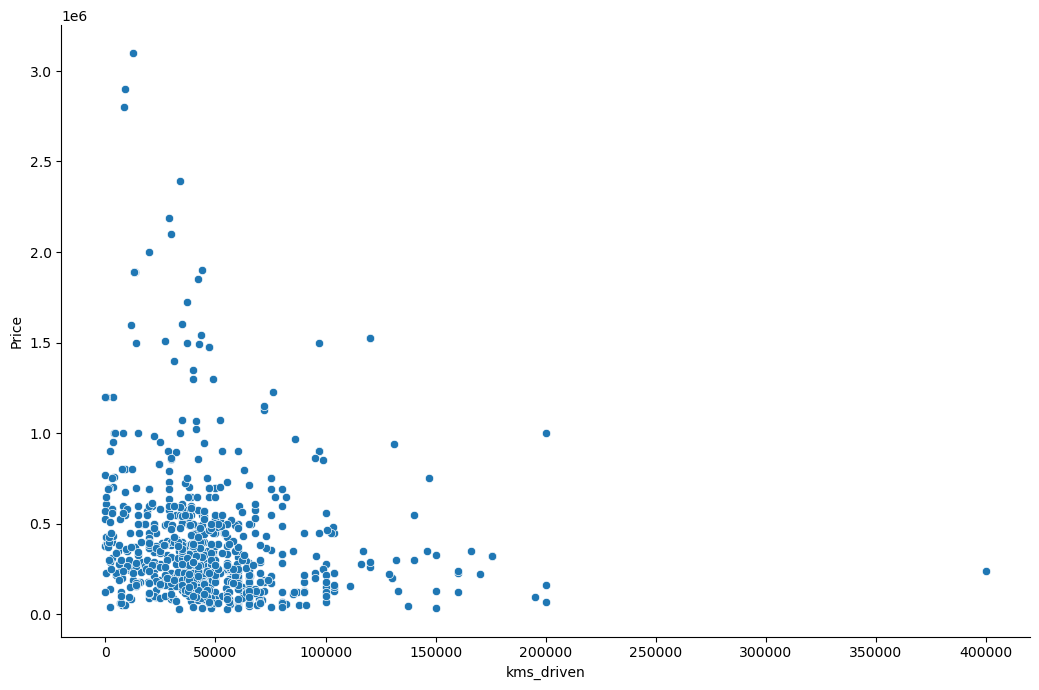

In [35]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

**Checking relationship of Fuel Type with Price**

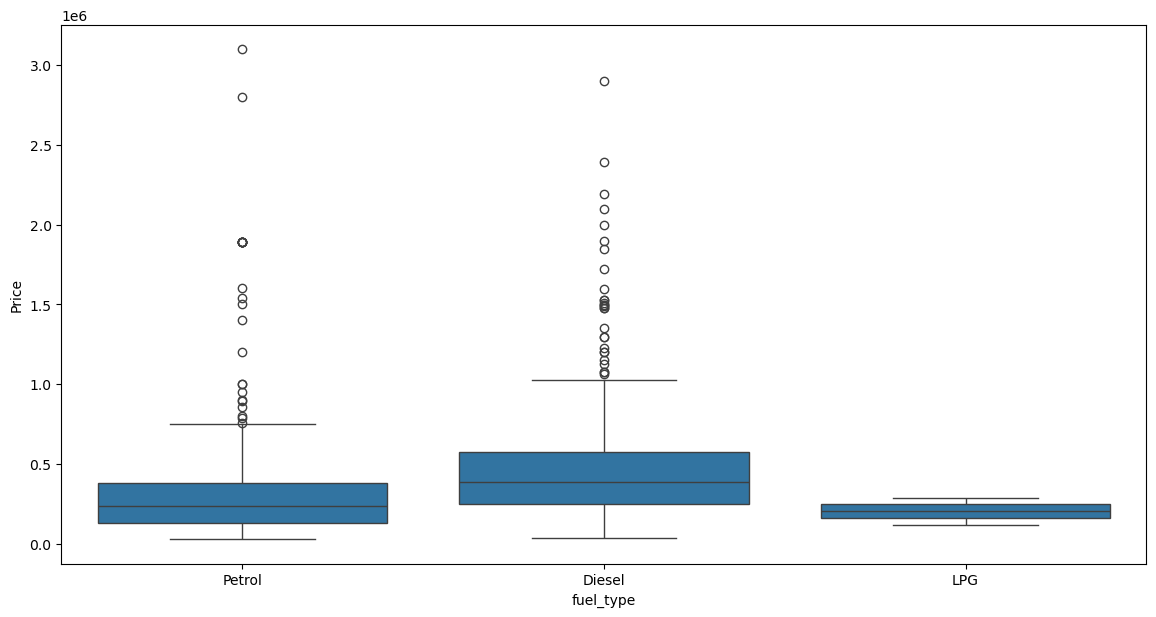

In [36]:
plt.figure(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)
plt.show()

**Relationship of Price with FuelType, Year and Company mixed**

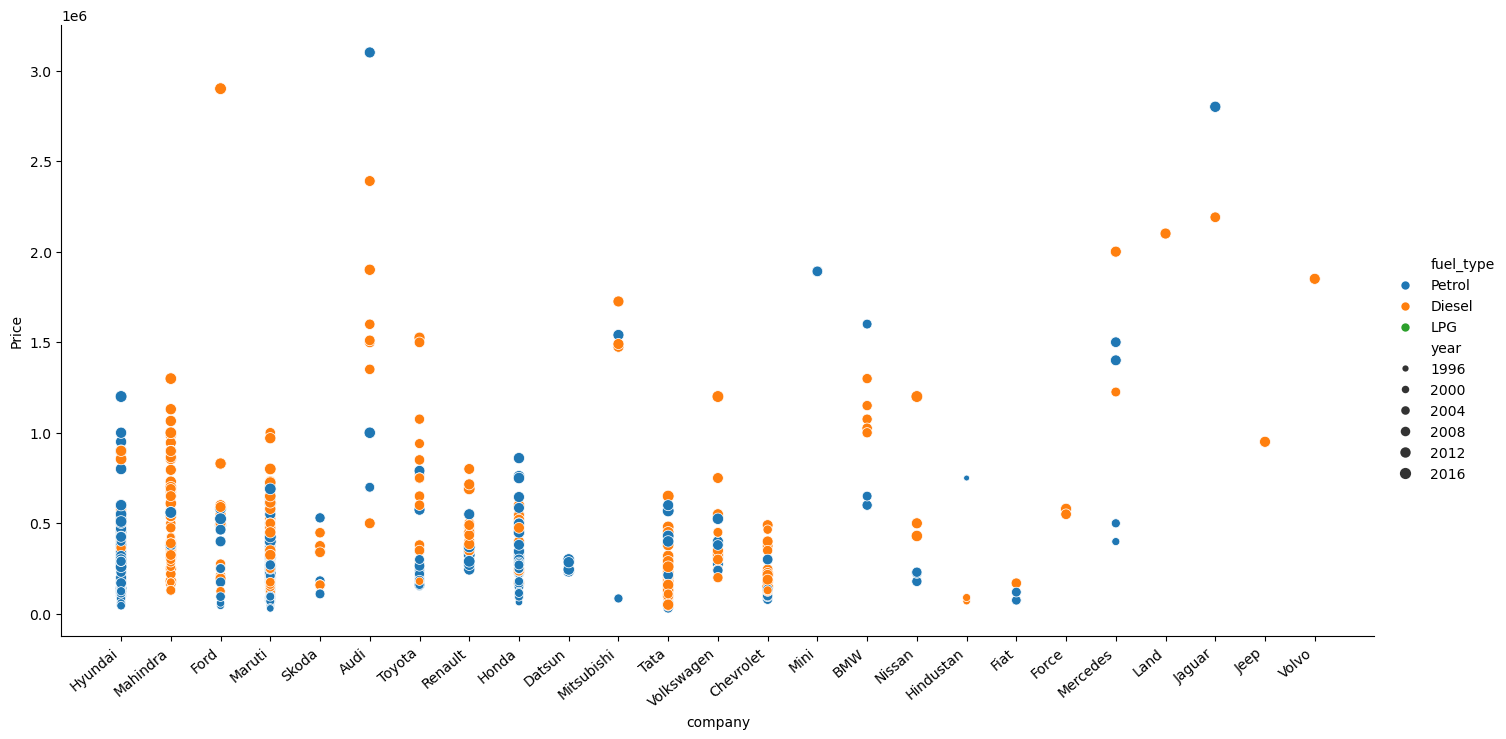

In [37]:
sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)

plt.xticks(rotation=40, ha='right')
plt.show()

In [38]:
# Add new features
car['car_age'] = 2025 - car['year']   # replace 2025 with actual current year if known
car['log_kms'] = np.log1p(car['kms_driven'])  # log transform to reduce skew

**# Extracting Training Data**

In [39]:
X=car[['name','company','car_age','log_kms','fuel_type']]
y=car['Price']


**Applying Train Test Split**

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

**Creating an OneHotEncoder object to contain all the possible categories**

In [43]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


**Creating a column transformer to transform categorical columns**

In [44]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

**Linear Regression Model**

In [45]:
lr=LinearRegression()

**Making a pipeline**

In [46]:
pipe=make_pipeline(column_trans,lr)

**Fitting the model**

In [47]:
pipe.fit(X_train,y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:
y_pred=pipe.predict(X_test)

**Checking R2 Score**

In [49]:
r2_score(y_test,y_pred)

0.8156361131333443

**Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.87 as r2_score**

In [50]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [51]:
np.argmax(scores)

124

In [52]:
scores[np.argmax(scores)]

0.891705108376425

**The best model is found at a certain random state**

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8702665827011549

**Random Forest Regression Model**

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf = RandomForestRegressor(
    n_estimators=200,   # number of trees
    max_depth=15,       # limit depth to reduce overfitting
    random_state=42)

**Making a pipeline with Random Forest Regression**

In [56]:
pipe_rf = make_pipeline(column_trans, rf)

**Fitting the model**

In [57]:
pipe_rf.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [58]:
y_pred_rf = pipe_rf.predict(X_test)

**Checking R2 Score**

In [59]:
print("R2 Score:", r2_score(y_test, y_pred_rf))


R2 Score: 0.7495142173977958


**Hypertuning the parameters of Random Forest model**

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "randomforestregressor__n_estimators": [100, 200, 300],
    "randomforestregressor__max_depth": [10, 15, 20, None],
    "randomforestregressor__min_samples_split": [2, 5, 10],
    "randomforestregressor__min_samples_leaf": [1, 2, 4]
}

In [61]:
grid_search = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring="r2",          # optimize for R² score
    n_jobs=-1,
    verbose=2
)

In [62]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'randomforestregressor__max_depth': [10, 15, ...], 'randomforestregressor__min_samples_leaf': [1, 2, ...], 'randomforestregressor__min_samples_split': [2, 5, ...], 'randomforestregressor__n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('onehotencoder', ...)]"


In [63]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV R2 Score:", grid_search.best_score_)

Best Parameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 100}
Best CV R2 Score: 0.6540579919936554


In [64]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [65]:
print("Test R2 Score:", r2_score(y_test, y_pred_rf))

Test R2 Score: 0.7495142173977958


**Gradient Boosting (XGBoost)**

In [66]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42)

pipe_xgb = make_pipeline(column_trans, xgb)
pipe_xgb.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('xgbregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [67]:
y_pred_xgb = pipe_xgb.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred_xgb))

R2 Score: 0.8610086441040039


**Hypertuning with RandomizedSearchCV**

In [68]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV
param_distrib = {
    "xgbregressor__n_estimators": randint(400, 1600),
    "xgbregressor__max_depth": randint(3, 10),
    "xgbregressor__learning_rate": uniform(0.01, 0.1),
    "xgbregressor__subsample": uniform(0.6, 0.4),
    "xgbregressor__colsample_bytree": uniform(0.6, 0.4),
    "xgbregressor__min_child_weight": randint(1, 10),
    "xgbregressor__reg_lambda": uniform(0.0, 5.0),
}

# --- CV strategy ---
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

# --- RandomizedSearchCV ---
search = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=param_distrib,
    n_iter=40,               # increase to 100+ for better results
    scoring="r2",
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best CV R²:", search.best_score_)
print("Best Params:", search.best_params_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best CV R²: 0.6735834300518035
Best Params: {'xgbregressor__colsample_bytree': 0.6987504251354405, 'xgbregressor__learning_rate': 0.07963042728397883, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 1, 'xgbregressor__n_estimators': 1351, 'xgbregressor__reg_lambda': 0.18443473677266398, 'xgbregressor__subsample': 0.8438257335919588}


In [69]:
# --- Final evaluation on test set ---
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test R²:", r2_score(y_test, y_pred))


Test R²: 0.8594003915786743


**r2 score of LR is o.87, RF is 0.75, XGB is 0.86. so we will import pickle file with LR and predict any new data**

**import pickle file**

In [70]:
import pickle

In [71]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

**Predict any new data**

In [72]:
# New raw input
new_data = pd.DataFrame(
    data=[['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],
    columns=['name','company','year','kms_driven','fuel_type'])

# Apply same feature engineering as training
new_data['car_age'] = 2025 - new_data['year']
new_data['log_kms'] = np.log1p(new_data['kms_driven'])

# Select only the features used in training
X_new = new_data[['name','company','car_age','log_kms','fuel_type']]

# Prediction
prediction = pipe.predict(X_new)
print("Predicted Price:", prediction)

Predicted Price: [455275.79492925]
